# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder

## Load the Data

In [37]:
accidents_df = pd.read_csv('Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
# I will now check the data frame to understand its structure and how the values are displayed
accidents_df.sample(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
35742,306850.0,827810.0,-3.548852,57.331347,91,3.0,1,1.0,21/05/2006,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2006
30423,540920.0,184280.0,0.030612,51.539781,1,3.0,2,1.0,22/07/2007,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Unknown,Dry,1.0,No,2007
13475,488760.0,180830.0,-0.722126,51.519373,43,2.0,1,1.0,02/04/2012,2,...,6,7408,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2012
28702,384361.0,389097.0,-2.236674,53.398455,6,3.0,2,3.0,30/12/2011,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,2.0,Yes,2011
45702,267830.0,197710.0,-3.912401,51.662539,62,3.0,1,1.0,18/05/2011,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Unknown,Wet/Damp,1.0,Yes,2011
6377,530820.0,184940.0,-0.114693,51.548142,1,3.0,2,1.0,17/07/2007,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2007
11819,488660.0,375740.0,-0.671990,53.271231,32,3.0,2,2.0,16/03/2007,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2007
45053,414290.0,433350.0,-1.784541,53.796262,13,3.0,2,4.0,01/07/2006,7,...,6,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006
967,531360.0,103880.0,-0.136528,50.819506,47,3.0,1,1.0,26/01/2007,6,...,3,259,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2007
4296,445350.0,356330.0,-1.324109,53.102230,30,3.0,2,1.0,12/11/2014,4,...,3,38,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,No,2014


In [5]:
# I will now check the shape of the dataframe to really see how many features there are
accidents_df.shape

(52000, 26)

In [6]:
# I will now check the main information of the dataframe datatypes and get a quick look on the null values
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [7]:
# Checking for null values
accidents_df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [8]:
# Checking for duplicates
accidents_df.duplicated().sum()

43

In [38]:
# Removing the duplicates
accidents_df.drop_duplicates(inplace=True)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [39]:
# Imputing the missing values with K Neighbor imputer as the dataframe contains a high amount of rows
imputer = KNNImputer(n_neighbors=5)
accidents_df['Number_of_Casualties'] = imputer.fit_transform(accidents_df[['Number_of_Casualties']])

In [40]:
accidents_df['Accident_Severity'] = imputer.fit_transform(accidents_df[['Accident_Severity']])

In [41]:
# For the two columns with categorical values I will fill the null values with the mode
accidents_df['Light_Conditions'].fillna(accidents_df['Light_Conditions'].mode()[0], inplace=True)

In [42]:
accidents_df['Urban_or_Rural_Area'].fillna(accidents_df['Urban_or_Rural_Area'].mode()[0], inplace=True)

In [43]:
# Checking null values after imputing
accidents_df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [44]:
# I will remove the date and Local_Authority_(Highway) columns as these two columns provide complicate means of encoding
accidents_df.drop(['Date', 'Local_Authority_(Highway)'], axis=1, inplace=True)

In [45]:
# I have noticed that the number of casualties column is an object, which is incorrect as it is suppose to be a numerical column
accidents_df['Number_of_Casualties'].unique()
accidents_df['Number_of_Casualties'] = accidents_df['Number_of_Casualties'].astype(int)

In [46]:
# I Encode categorical data types using the label encoder
categorical_columns = ['Road_Type', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident']
label_encoder = LabelEncoder()
for column in categorical_columns:
    accidents_df[column] = label_encoder.fit_transform(accidents_df[column])

In [47]:
# I will now scale the data
scaler = StandardScaler()
accidents_df_scaled = pd.DataFrame(scaler.fit_transform(accidents_df), columns=accidents_df.columns)

In [48]:
# I will now use principle component analysis to reduce the number of features
pca = PCA(n_components=2)
accidents_df_pca = pca.fit_transform(accidents_df_scaled)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [49]:
# The features that will be selected will be the 2 features that the diminsionality reduction has done
accidents_df_pca = pd.DataFrame(accidents_df_pca, columns=['PC1', 'PC2'])

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [63]:
# This visualisation will help understand the areas with high accident severities based on the longitude and latitude of the accident
# This is figure 1
px.scatter(accidents_df, x="Latitude", y="Longitude", color='Accident_Severity')

Figure 1: from this figure i can see that the highest concentration of vehicle accidents and severity happen mostly on the western side of the city, meanwhile the thin eastern side seems to have high severity accidents but not as often as the western side

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

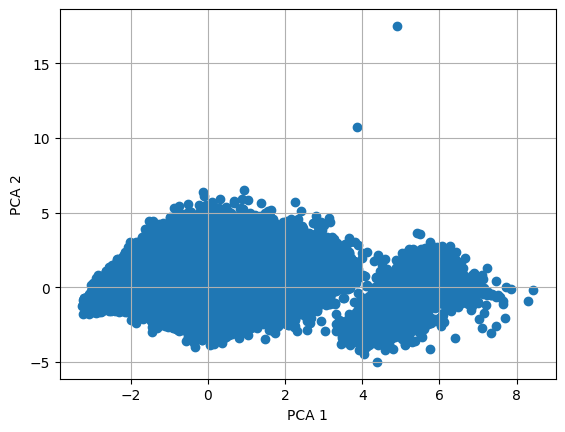

In [71]:
# Here I will plot the figure without any clustering to get an idea on how the clustering should be done before training the k means
# This is figure 2
fig = plt.figure(0)
plt.grid(True)
plt.scatter(accidents_df_pca.iloc[:, 0], accidents_df_pca.iloc[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
# We will evaluate which best n value of cluster centres using the elbow method
inertias = []
mapping2 = {}
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)

    inertias.append(kmeanModel.inertia_)

    mapping2[k] = kmeanModel.inertia_

In [75]:
# I will now see the intertia values and visualise the values and see the best number of clusters
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 307594.1938214701
2 : 194847.42517067387
3 : 118294.94097518105
4 : 73661.5327422587
5 : 58664.701263162904
6 : 50155.66204102093
7 : 43418.45211778629
8 : 37424.66809747168
9 : 32717.0822682333
10 : 29564.55478557924


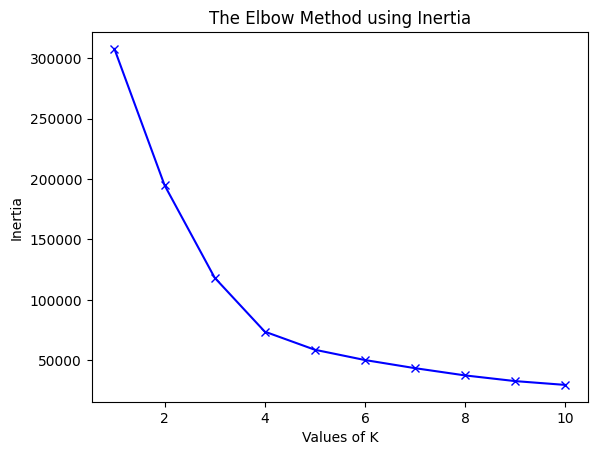

In [76]:
# Visualisation of the mapped intertia values
# This is figure 3
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Figure 3: Use the visualisation of the elbow method to identify the best value for k within the pca cluster, just by looking at this graph I can see that the best value is 4.

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [77]:
# The silhouette score is created and tested on after the elbow method is done
sc = silhouette_score(accidents_df_pca, kmeanModel.labels_)
print(f'The silhouette score is {sc}')

The silhouette score is 0.4027576911114877


## Plot the data points with their predicted cluster center

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



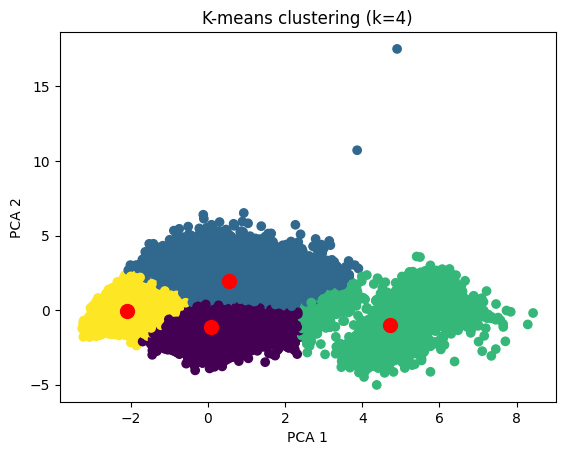

In [82]:
# After outlining the best k number I will now use that number and plot the centres for the pca data
# This is figure 4
inertia_values = []
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
inertia_values.append(kmeans.inertia_)
plt.scatter(accidents_df_pca.iloc[:, 0], accidents_df_pca.iloc[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title('K-means clustering (k=4)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Figure 4: After the k means model predicted the centres I can see within the figure that the clusters have been divided into 4 different cluster groups

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Justify your Feature Selection:
The main reason why I used the PCA features is because the data had many features and it would be hard to perform clustering method on each pair of features in order to find the best cluster group, using the PCA method is easier and can identify groups fairly quickly.

Number of cluster choices:
Depending on the output of the elbow method used, it would determine the best number of clusters for the scatter plot and it has indeed shown that it is the best choice based on the grouping observed on figure 4.

Evaluation:
 I used the silhouette score because it evaluates how good clustering results are in a clustered data. This score was calculated by measuring different points and the similarities it has for that group.

 Improvement or recommendation:

I feel like I used everything to gain an insight on the data.